# Desafio 5: Pandas Presidente!

Pode fazer download do notebook do desafio e trabalhar no seu notebook favorito (Deepnote, Colab, Jupyter Notebook...)

Entregue sua solução em formato notebook (.ipynb), com seu nome no começo (por exemplo: `DiegoLaplagne_Desafio05_Pandas.ipynb`) seguindo o link:
> https://www.dropbox.com/request/8MrRpKE3GhqwF9QJwZUb



# Preparativos
## Importe os módulos que precisar

In [448]:
# Seu código aqui...
import pandas as pd

## Obtenha e carregue os dados do TSE
- Do site https://dadosabertos.tse.jus.br/dataset/resultados-2022, baixe os dados de "Votação nominal por município e zona".
- Extraga a planilha `votacao_candidato_munzona_2022_BR.csv` e o documento `leiame.pdf` do zip.
- Carregue a planilha em um DataFrame chamado `votos` usando a função `read_csv()` (dê uma olhada na documentação dela)
    - Note que, como diz no _leiame_, "A codificação de caracteres dos arquivos é 'Latin-1'.
    - Atenção ao fato de que os csv do TSE usam ';' como separador de colunas!

In [449]:
votos = pd.read_csv('votacao_candidato_munzona_2022_BR.csv', sep=";", encoding="Latin-1")

## Dedique um tempo a entender a organização da tabela
- O que representa cada uma das linhas?
- Que informação tem nas colunas? (Tem explicações no leiame.pdf)

Nota: não precisa responder este ítem, basta você entender para conseguir responder as próximas.

## Reduzindo a tabela
Tem muitas colunas que a gente não precisa, vamos deixar a tabela mais enxuta:
- Na tabela `votos`, fique só com as colunas: 'SG_UF','CD_MUNICIPIO','NM_MUNICIPIO','NR_ZONA','NR_CANDIDATO','NM_URNA_CANDIDATO' e 'QT_VOTOS_NOMINAIS_VALIDOS'

In [450]:
votos = votos[['SG_UF','CD_MUNICIPIO','NM_MUNICIPIO','NR_ZONA','NR_CANDIDATO','NM_URNA_CANDIDATO','QT_VOTOS_NOMINAIS_VALIDOS']]

## Quantos códigos de município diferentes existem na tabela?
- Pode usar `.unique()` para ficar com um array com os valores diferentes que existem (em uma coluna por exemplo) e ver quantos elementos esse array tem.

In [451]:
votos['CD_MUNICIPIO'].nunique()

5751

# Resultados eleitorais
Vamos usar `.groupby()` e o aggregate `.sum()` para somar os votos de cada candidato en diferentes regiões.
## Qual foi o resultado total no Brasil?
- Obtenha a soma total de votos de cada candidato no Brasil todo. Apresente o resultado em ordem descendente com `.sort_values()`
- Converta os valores em percentagens do total.
- Apresente o resultado como "pie plot" (`.plot.pie()`)

In [452]:
total_br = pd.DataFrame(votos.groupby('NM_URNA_CANDIDATO', sort=True)['QT_VOTOS_NOMINAIS_VALIDOS'].sum())

In [453]:
total_br['QT_VOTOS_NOMINAIS_VALIDOS'] = (total_br['QT_VOTOS_NOMINAIS_VALIDOS']/ (total_br['QT_VOTOS_NOMINAIS_VALIDOS'].sum() )*100)

In [454]:
total_br.sort_values(by='QT_VOTOS_NOMINAIS_VALIDOS', ascending=False)

,QT_VOTOS_NOMINAIS_VALIDOS
NM_URNA_CANDIDATO,
LULA,48.430720
JAIR BOLSONARO,43.197553
SIMONE TEBET,4.157519
CIRO GOMES,3.044317
SORAYA THRONICKE,0.508294
FELIPE D AVILA,0.473407
PADRE KELMON,0.068620
LÉO PÉRICLES,0.045267
SOFIA MANZANO,0.038586


In [455]:
import plotly.express as px

fig = px.pie(total_br, values='QT_VOTOS_NOMINAIS_VALIDOS', 
             names=list(total_br.index), title='Eleições Presidenciais 2022 - Brasil',
             color=list(total_br.index), color_discrete_map={'LULA':'red', 'JAIR BOLSONARO':'royalblue'})
fig.show()

## Qual foi o resultado no RN?
- Repita o anterior, mas selecionando previamente só os votos do RN.

In [456]:
filter_rn = (votos['SG_UF']=="RN")
rn = votos[filter_rn]
rn.head()

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS
21,RN,16993,JANDAÍRA,62,14,PADRE KELMON,0
27,RN,16357,BREJINHO,44,15,SIMONE TEBET,195
61,RN,16594,CRUZETA,22,16,VERA,0
88,RN,17450,MARCELINO VIEIRA,65,22,JAIR BOLSONARO,608
143,RN,18996,VILA FLOR,11,44,SORAYA THRONICKE,5


In [457]:
rn_pie = pd.DataFrame(rn.groupby('NM_URNA_CANDIDATO', sort=True)['QT_VOTOS_NOMINAIS_VALIDOS'].sum()).sort_values(by='QT_VOTOS_NOMINAIS_VALIDOS', ascending=False)

In [458]:
rn_pie['QT_VOTOS_NOMINAIS_VALIDOS'] = (rn_pie['QT_VOTOS_NOMINAIS_VALIDOS']/ (rn_pie['QT_VOTOS_NOMINAIS_VALIDOS'].sum() )*100)

rn_pie.head()

,QT_VOTOS_NOMINAIS_VALIDOS
NM_URNA_CANDIDATO,
LULA,62.980206
JAIR BOLSONARO,31.023871
CIRO GOMES,3.574019
SIMONE TEBET,1.924660
SORAYA THRONICKE,0.215517


In [459]:
import plotly.express as px

fig_rn = px.pie(rn_pie, values='QT_VOTOS_NOMINAIS_VALIDOS', 
             names=list(rn_pie.index), title='Eleições Presidenciais 2022 - RN',
             color=list(rn_pie.index), color_discrete_map={'LULA':'red', 'JAIR BOLSONARO':'royalblue'})
fig_rn.show()

### Mapa de votações - RN

In [460]:
codigos_tse = pd.read_csv('municipios_brasileiros_tse.csv')

In [461]:
rn = pd.merge(rn, codigos_tse[['codigo_tse','codigo_ibge']], left_on='CD_MUNICIPIO', right_on='codigo_tse',how='left')

In [462]:
!pip install geobr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [463]:
import geobr
rn_muni = geobr.read_municipality(code_muni="RN", year=2019)

In [464]:
rn_muni

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,2400109.0,Acari,24.0,RN,Rio Grande do Norte,2.0,Nordeste,"MULTIPOLYGON (((-36.75809 -6.51295, -36.76111 ..."
1,2400208.0,Açu,24.0,RN,Rio Grande do Norte,2.0,Nordeste,"MULTIPOLYGON (((-37.16869 -5.47454, -37.14295 ..."
2,2400307.0,Afonso Bezerra,24.0,RN,Rio Grande do Norte,2.0,Nordeste,"MULTIPOLYGON (((-36.85191 -5.44348, -36.86041 ..."
3,2400406.0,Água Nova,24.0,RN,Rio Grande do Norte,2.0,Nordeste,"MULTIPOLYGON (((-38.31144 -6.17659, -38.28854 ..."
4,2400505.0,Alexandria,24.0,RN,Rio Grande do Norte,2.0,Nordeste,"MULTIPOLYGON (((-38.10066 -6.33594, -38.09984 ..."
...,...,...,...,...,...,...,...,...
162,2414704.0,Várzea,24.0,RN,Rio Grande do Norte,2.0,Nordeste,"MULTIPOLYGON (((-35.35562 -6.40803, -35.37294 ..."
163,2414753.0,Venha-Ver,24.0,RN,Rio Grande do Norte,2.0,Nordeste,"MULTIPOLYGON (((-38.54254 -6.28616, -38.49228 ..."
164,2414803.0,Vera Cruz,24.0,RN,Rio Grande do Norte,2.0,Nordeste,"MULTIPOLYGON (((-35.36982 -6.04982, -35.36909 ..."
165,2414902.0,Viçosa,24.0,RN,Rio Grande do Norte,2.0,Nordeste,"MULTIPOLYGON (((-37.92119 -5.95980, -37.93401 ..."


In [465]:
import numpy as np

rn_muni['code_muni'] = rn_muni['code_muni'].astype(np.int64)

In [466]:
rn_com_coordenadas = pd.merge(rn, rn_muni[['code_muni','geometry']], left_on='codigo_ibge', right_on='code_muni', how='left')

In [467]:
from geopandas import GeoDataFrame

rn_com_coordenadas = GeoDataFrame(rn_com_coordenadas)

In [468]:
rn_com_votos = rn_com_coordenadas.groupby(['NM_MUNICIPIO','NM_URNA_CANDIDATO',])['QT_VOTOS_NOMINAIS_VALIDOS'].sum().unstack(-1).reset_index()

In [469]:
rn_com_votos['total_votos'] = rn_com_votos['CIRO GOMES']+rn_com_votos['FELIPE D AVILA']+rn_com_votos['JAIR BOLSONARO']+rn_com_votos['LULA']+rn_com_votos['LÉO PÉRICLES']+rn_com_votos['PADRE KELMON']+rn_com_votos['SIMONE TEBET']+rn_com_votos['SOFIA MANZANO']+rn_com_votos['SORAYA THRONICKE']+rn_com_votos['VERA']

In [470]:
mun = rn_com_votos['NM_MUNICIPIO'].squeeze()
lulala = rn_com_votos['LULA'].squeeze()
biloliro = rn_com_votos['JAIR BOLSONARO'].squeeze()
total_votos = rn_com_votos['total_votos'].squeeze()

df = {'name_municipio': mun, 'votos_lula': lulala, 'votos_bolsonaro': biloliro, 'total_votos': total_votos}
votos = pd.DataFrame(df)

In [471]:
rn_completo = pd.merge(rn_com_coordenadas, votos, right_on='name_municipio', left_on='NM_MUNICIPIO', how='left')

In [472]:
rn_completo['votos_lula'] = (rn_completo['votos_lula'] / rn_completo['total_votos'])*100
rn_completo['votos_bolsonaro'] = ((rn_completo['votos_bolsonaro'])/ (rn_completo['total_votos']) *100)

In [473]:
rn_completo.loc[rn_completo['votos_lula'] > rn_completo['votos_bolsonaro'], 'cor'] = 1 
rn_completo.loc[rn_completo['votos_lula'] < rn_completo['votos_bolsonaro'], 'cor'] = -1 

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



(-38.762196508100004, -34.7878037099, -7.0910535932000105, -4.708040406800006)

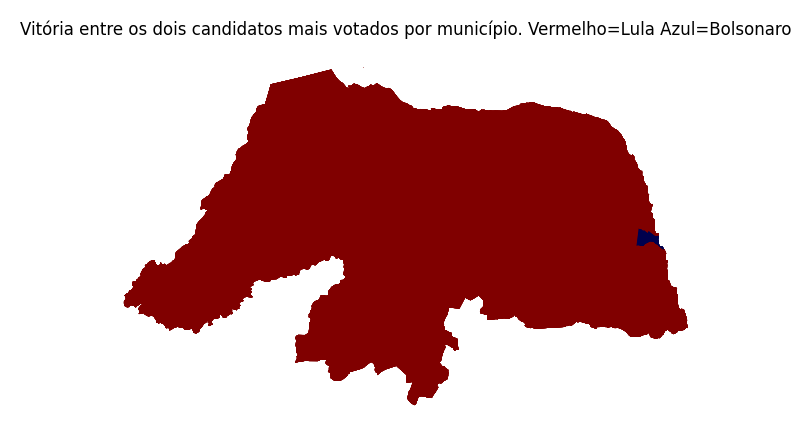

In [474]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

rn_completo.plot(
    column='cor',
    cmap='seismic',
    legend=False,
    ax=ax,
)

ax.set_title("Vitória entre os dois candidatos mais votados por município. Vermelho=Lula Azul=Bolsonaro")
ax.axis("off")